In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,GRU,Bidirectional,Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = web.DataReader('GREAVESCOT.NS', data_source='yahoo', start='2002-01-01', end='2020-01-17')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-09-09,14.100000,13.300000,14.000000,14.080000,3325.0,4.492620
2004-09-10,14.160000,13.410000,13.410000,13.800000,5315.0,4.403280
2004-09-13,14.300000,13.990000,13.990000,14.000000,82895.0,4.467096
2004-09-14,14.200000,13.100000,14.100000,13.700000,13195.0,4.371372
2004-09-15,14.000000,13.360000,13.820000,13.500000,54940.0,4.307557
...,...,...,...,...,...,...
2020-01-13,141.500000,138.050003,139.149994,138.399994,122517.0,138.399994
2020-01-14,141.199997,136.149994,139.100006,139.149994,188923.0,139.149994
2020-01-15,145.050003,138.500000,138.949997,143.199997,406437.0,143.199997


In [3]:
# import pandas_datareader.data as web on monthly basis

# data = web.get_data_yahoo('GREAVESCOT.NS','01/01/2015','2019-12-17',interval='m')
# data

C:\Users\SAHIL\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


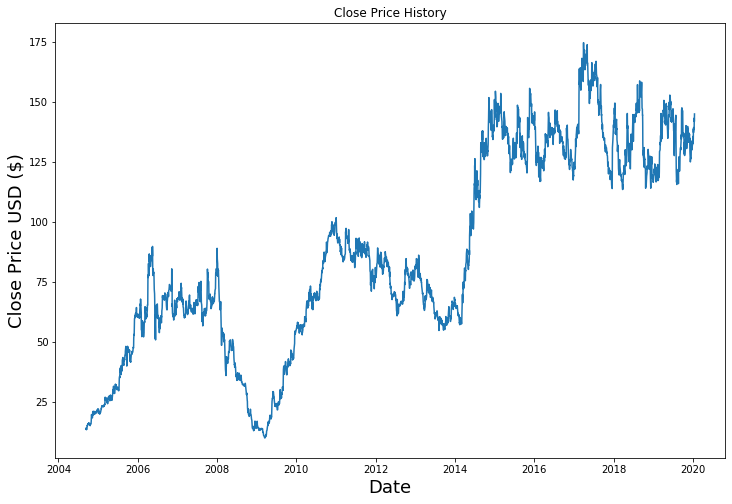

In [4]:
plt.figure(figsize=(12,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
dataset = np.array(data)
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

3023

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02449848],
       [0.02279635],
       [0.02401216],
       ...,
       [0.80942246],
       [0.80060789],
       [0.81975679]])

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.02449848, 0.02279635, 0.02401216, 0.02218845, 0.02097264,
       0.02285714, 0.02297872, 0.02279635, 0.02723404, 0.03227963,
       0.03148936, 0.03088146, 0.03240121, 0.03452887, 0.03617021,
       0.03531915, 0.03458966, 0.03714285, 0.03598784, 0.03598784,
       0.0368997 , 0.03860182, 0.03659574, 0.0343465 , 0.03477204,
       0.03483282, 0.03300911, 0.03221885, 0.03130699, 0.03635259,
       0.03544073, 0.03507598, 0.03683891, 0.03969605, 0.04072948,
       0.0593313 , 0.05787234, 0.05471124, 0.05392097, 0.05647416,
       0.05355623, 0.05088146, 0.05647416, 0.05617022, 0.0649848 ,
       0.06522797, 0.06790273, 0.06382978, 0.05860182, 0.06024315,
       0.06139817, 0.06218845, 0.06164134, 0.06054711, 0.06437689,
       0.06735562, 0.06139817, 0.06151976, 0.06218845, 0.06224924])]
[0.06243160684176957]

[array([0.02449848, 0.02279635, 0.02401216, 0.02218845, 0.02097264,
       0.02285714, 0.02297872, 0.02279635, 0.02723404, 0.03227963,
       0.03148936, 0.03088146, 0.03

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2963, 60, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2963/2963 [==============================] - 123s 41ms/step - loss: 0.0015


In [13]:
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
#np.savetxt("close.csv", x_test, delimiter=",")

In [16]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [17]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.611746438651659

C:\Users\SAHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


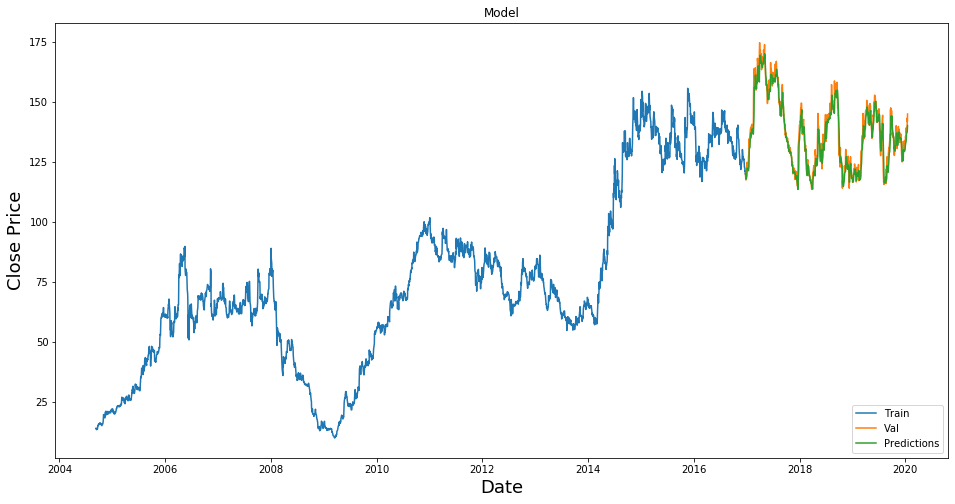

In [20]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
valid

,Close,Predictions
Date,,
2016-12-23,119.699997,119.988831
2016-12-26,117.400002,119.393303
2016-12-27,118.800003,118.149361
2016-12-28,119.449997,117.853447
2016-12-29,119.000000,118.098656
...,...,...
2020-01-13,138.399994,137.277328
2020-01-14,139.149994,137.310471
2020-01-15,143.199997,137.553345


In [112]:
type(valid)

pandas.core.frame.DataFrame

In [22]:
#Get the quote
apple_quote = web.DataReader('GREAVESCOT.NS', data_source='yahoo', start='2012-01-01', end='2020-01-18')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[141.56352]]


In [24]:
pred_price

array([[141.56352]], dtype=float32)